In [1]:
import os
import cv2
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
# Ruta del dataset en Kaggle
dataset_path = "/kaggle/input/wikiart-faces/artfaces"
index_file = "/kaggle/working/index.pkl"  # Guardar índice en espacio de trabajo

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images

In [4]:
def build_hist(image, bins=256):
    plt.imshow(image)  # pintamos la imagen de entrada
    canales = cv2.split(image)
    hist_r = cv2.calcHist(canales, [0], None, [256], [0, 256])
    hist_g = cv2.calcHist(canales, [1], None, [256], [0, 256])
    hist_b = cv2.calcHist(canales, [2], None, [256], [0, 256])

    # pintamos los histogramas de color
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    axs[0].plot(hist_r, color='r')
    axs[1].plot(hist_g, color='g')
    axs[2].plot(hist_b, color='b')
    plt.show()

In [5]:
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # 确保是文件夹
        print(f"Processing folder: {class_name}")
        our_images = load_images_from_folder(class_path)

Processing folder: post-impressionism
Processing folder: minimalism
Processing folder: analytical-cubism
Processing folder: symbolism
Processing folder: impressionism
Processing folder: contemporary-realism
Processing folder: color-field-painting
Processing folder: fauvism
Processing folder: high-renaissance
Processing folder: northern-renaissance
Processing folder: ukiyo-e
Processing folder: early-renaissance
Processing folder: rococo
Processing folder: pointillism
Processing folder: na-ve-art-primitivism
Processing folder: cubism
Processing folder: pop-art
Processing folder: art-nouveau-modern
Processing folder: abstract-expressionism
Processing folder: baroque
Processing folder: expressionism
Processing folder: romanticism
Processing folder: new-realism
Processing folder: synthetic-cubism
Processing folder: mannerism-late-renaissance
Processing folder: realism


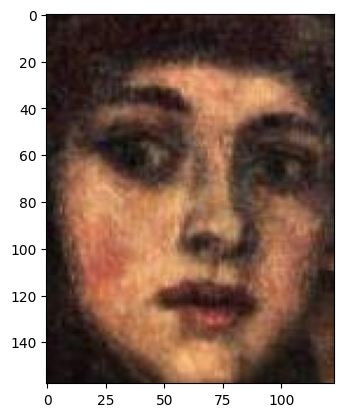

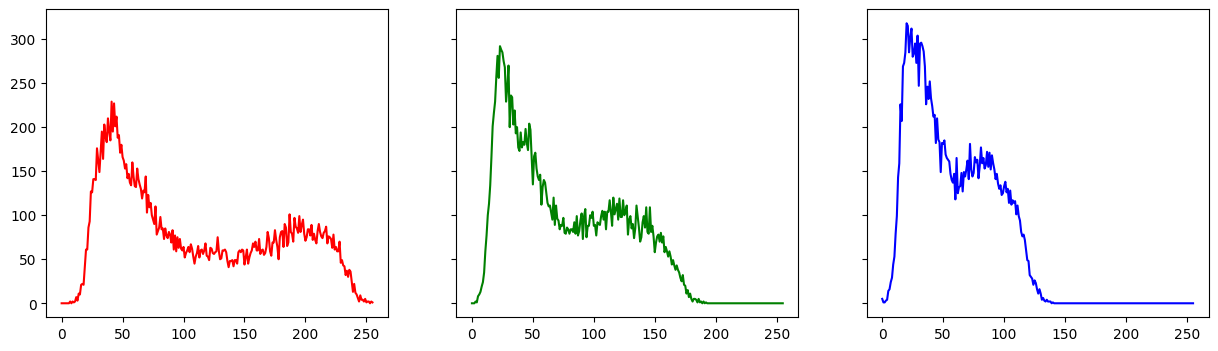

In [6]:
build_hist(our_images[0])

In [7]:
def compute_color_histogram(image, bins=8):
    # 将图像从BGR转换为RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 计算每个通道的直方图
    hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256])
    
    # 将直方图归一化
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()
    
    # 合并三个通道的直方图
    hist = np.hstack([hist_r, hist_g, hist_b])
    
    return hist

In [8]:
all_histograms = []
labels = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # 确保是文件夹
        print(f"Processing folder: {class_name}")
        images = load_images_from_folder(class_path)
        for image in images:
            hist = compute_color_histogram(image)
            all_histograms.append(hist)
            labels.append(class_name)

Processing folder: post-impressionism
Processing folder: minimalism
Processing folder: analytical-cubism
Processing folder: symbolism
Processing folder: impressionism
Processing folder: contemporary-realism
Processing folder: color-field-painting
Processing folder: fauvism
Processing folder: high-renaissance
Processing folder: northern-renaissance
Processing folder: ukiyo-e
Processing folder: early-renaissance
Processing folder: rococo
Processing folder: pointillism
Processing folder: na-ve-art-primitivism
Processing folder: cubism
Processing folder: pop-art
Processing folder: art-nouveau-modern
Processing folder: abstract-expressionism
Processing folder: baroque
Processing folder: expressionism
Processing folder: romanticism
Processing folder: new-realism
Processing folder: synthetic-cubism
Processing folder: mannerism-late-renaissance
Processing folder: realism


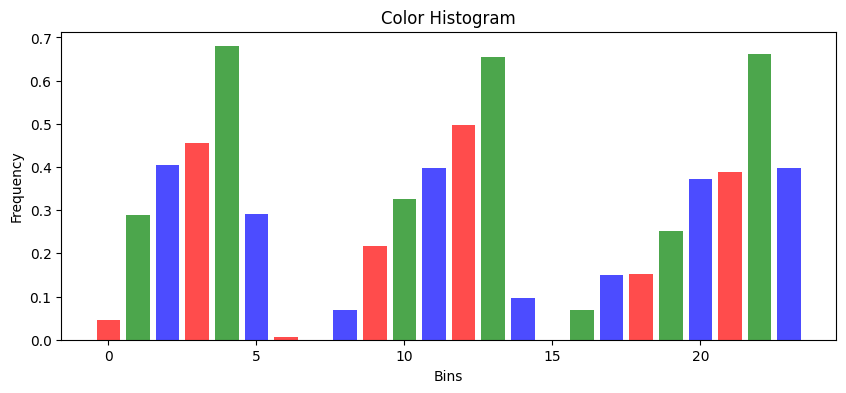

In [9]:
# 5. 可视化某个图像的直方图（可选）
def plot_color_histogram(hist, bins=8):
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(bins * 3), hist, color=['r', 'g', 'b'] * bins, alpha=0.7)
    plt.title('Color Histogram')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()

# 选择一个图像的直方图进行可视化
plot_color_histogram(all_histograms[0])



TypeError: Invalid shape (24,) for image data

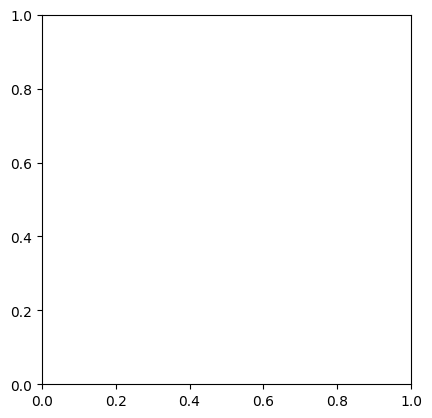

In [10]:
def build_hist(image, bins=256):
    plt.imshow(image)  # pintamos la imagen de entrada
    canales = cv2.split(image)
    hist_r = cv2.calcHist(canales, [0], None, [256], [0, 256])
    hist_g = cv2.calcHist(canales, [1], None, [256], [0, 256])
    hist_b = cv2.calcHist(canales, [2], None, [256], [0, 256])

    # pintamos los histogramas de color
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    axs[0].plot(hist_r, color='r')
    axs[1].plot(hist_g, color='g')
    axs[2].plot(hist_b, color='b')
    plt.show()

build_hist(all_histograms[0])

In [ ]:
def plot_color_histogram_line(hist, bins=8):
    plt.figure(figsize=(10, 4))
    
    # 创建 x 轴的值
    x_values = np.arange(bins * 3)
    
    # 绘制折线图
    plt.plot(x_values, hist, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)
    
    # 设置标题和标签
    plt.title('Color Histogram (Line Chart)')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    
    # 设置 x 轴刻度
    plt.xticks(x_values, [f'R{i//bins}' if i < bins else f'G{i//bins-1}' if i < 2*bins else f'B{i//bins-2}' for i in range(bins * 3)])
    
    # 显示网格
    plt.grid(True)
    plt.show()

In [ ]:
plot_color_histogram_line(all_histograms[0])

In [ ]:
def visualize_histogram(histograms, bins=256):
    """Visualiza los histogramas de color almacenados."""
    colors = ('r', 'g', 'b')  # Rojo, Verde, Azul
    plt.figure(figsize=(10, 5))
    for hist, color in zip(histograms, colors):
        plt.plot(hist, color=color, label=f"Canal {color.upper()}")
        plt.xlim([0, bins])
    
    plt.title("Histogramas de Color")
    plt.xlabel("Intensidad de color")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
visualize_histogram(all_histograms[0])

In [ ]:

# check how many images do i have per folder
image_count = 0
sample_images = {}

for root, dirs, files in os.walk(DATASET_PATH):
    class_name = os.path.basename(root)  # Nombre de la carpeta como clase
    
    # Filtrar solo imágenes
    image_files = [f for f in files if f.endswith((".jpg", ".png"))]
    
    if image_files:
        image_count += len(image_files)
        sample_images[class_name] = os.path.join(root, image_files[0])  # Guardar una imagen de muestra

# Mostrar el total de imágenes
image_count, sample_images

In [ ]:
# Función para extraer características de una imagen (Histograma de Color HSV)
def extract_features(image_path, bins=(8, 8, 8)):
    image = cv2.imread(image_path)
    if image is None:
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [ ]:
# Indexar imágenes en todas las subcarpetas
def index_images():
    index = {}
    for root, _, files in os.walk(DATASET_PATH):  # Recorre todas las subcarpetas
        for filename in files:
            if filename.endswith((".jpg", ".png")):  # Asegurar que sean imágenes
                image_path = os.path.join(root, filename)
                features = extract_features(image_path)
                if features is not None:
                    index[image_path] = features  # Guardar ruta completa

    with open(INDEX_FILE, "wb") as f:
        pickle.dump(index, f)
    
    print(f"Indexación completada. {len(index)} imágenes guardadas en {INDEX_FILE}")

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to dataset
dataset_path = "/kaggle/input/wikiart-faces/artfaces"

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load images
def load_images(dataset_path, sample_size=10):
    our_images = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # 确保是文件夹
            print(f"Processing folder: {class_name}")
            our_images = load_images_from_folder(class_path)
        return our_images

images = load_images(dataset_path)
plt.imshow(images[0]) 
plt.axis("off")
plt.show()

plt.imshow(images[1]) 
plt.axis("off")
plt.show()



In [ ]:
def smart_histogram_descriptor(image, bins=(8, 8, 8)):
    """
    Compute a smart color histogram descriptor in HSV space.
    Arguments:
        - image: Input image
        - bins: Tuple for histogram bin sizes
    Returns:
        - Flattened histogram vector
    """
    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Compute histogram (normalized)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    
    return hist

# Example usage
hist1 = smart_histogram_descriptor(images[0])
print("Histogram shape 1:", hist1.shape)

hist2 = smart_histogram_descriptor(images[1])
print("Histogram shape 2:", hist2.shape)

In [ ]:
import scipy.spatial

def histogram_distance(hist1, hist2, method="chi-square"):
    """
    Compute distance between two histograms.
    Arguments:
        - hist1, hist2: Histogram descriptors
        - method: Distance metric ("chi-square", "bhattacharyya", "emd", "cosine")
    Returns:
        - Distance score
    """
    if method == "chi-square":
        return 0.5 * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-10))  # Avoid division by zero
    
    elif method == "bhattacharyya":
        return -np.log(np.sum(np.sqrt(hist1 * hist2)))  # Bhattacharyya distance
    
    elif method == "cosine":
        return scipy.spatial.distance.cosine(hist1, hist2)  # Cosine similarity
    
    elif method == "euclidean":
        return np.linalg.norm(hist1 - hist2)  # L2 distance
    
    else:
        raise ValueError("Unknown distance method.")

# Example: Compute distance between first two images
dist = histogram_distance(hist1, hist2, method="chi-square")
print("Chi-Square Distance:", dist)


In [ ]:
def plot_histograms(image):
    """
    Plots RGB and HSV histograms for a given image.
    
    Arguments:
        - image: Input image (RGB format)
    """
    # Convert image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Define colors for plotting
    colors_rgb = ['red', 'green', 'blue']
    colors_hsv = ['orange', 'green', 'purple']
    channels = ['Channel 1', 'Channel 2', 'Channel 3']
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Plot RGB histograms
    for i, color in enumerate(colors_rgb):
        hist_rgb = cv2.calcHist([image], [i], None, [256], [0, 256])
        axes[0, i].plot(hist_rgb, color=color)
        axes[0, i].set_title(f"RGB {channels[i]}")
        axes[0, i].set_xlim([0, 256])
    
    # Plot HSV histograms
    for i, color in enumerate(colors_hsv):
        hist_hsv = cv2.calcHist([hsv], [i], None, [256], [0, 256])
        axes[1, i].plot(hist_hsv, color=color)
        axes[1, i].set_title(f"HSV {channels[i]}")
        axes[1, i].set_xlim([0, 256])
    
    plt.tight_layout()
    plt.show()

# Plot histograms for the first image
plot_histograms(images[0])